In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn import svm
#this is used to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:\\Users\\manideepreddy\\OneDrive\\Desktop\\Project\\Loan Data.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#number of missing values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.shape

(480, 13)

In [10]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Dependents column values
data["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
# replacing the value of 3+ into 4
data["Dependents"] = data["Dependents"].replace("3+",4)

In [13]:
# Dependents column values
data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

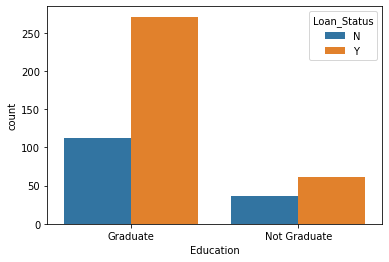

In [14]:
# Education and Loan_status
sns.countplot(x = "Education",hue = "Loan_Status",data = data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

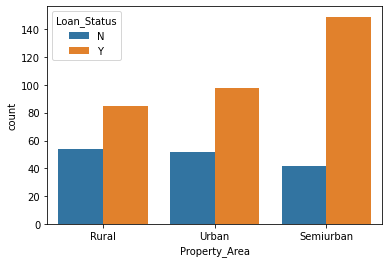

In [15]:
# Property_Area and Loan_Status
sns.countplot(x = "Property_Area",hue = "Loan_Status",data = data)

<AxesSubplot:xlabel='Married', ylabel='count'>

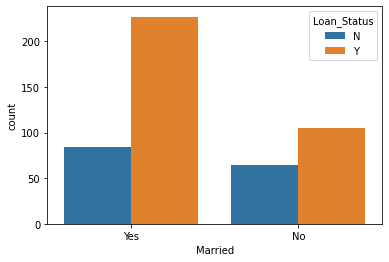

In [16]:
# Married and Loan_Status
sns.countplot(x = "Married",hue = "Loan_Status",data = data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

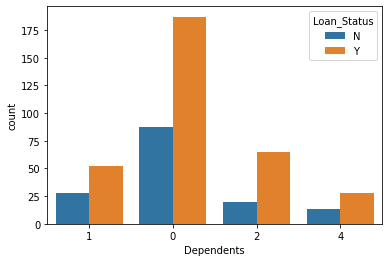

In [17]:
# Dependents and Loan_Status
sns.countplot(x = "Dependents",hue = "Loan_Status",data = data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

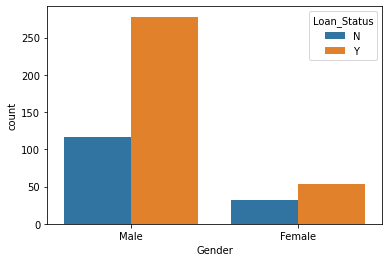

In [18]:
# Gender and Loan_Status
sns.countplot(x = "Gender",hue = "Loan_Status",data = data)

In [19]:
le = LabelEncoder()

In [20]:
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

In [21]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [22]:
# Converting the categorical values to Numerical values
data["Married"] = le.fit_transform(data["Married"])
data["Gender"] = le.fit_transform(data["Gender"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [24]:
# Dropping the Loan_ID from the data
data = data.drop("Loan_ID",axis = 1)

In [25]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [26]:
corr = data.corr()

In [27]:
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Education,0.059245,0.001652,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390
Property_Area,-0.000204,0.038653,-0.055005,-0.050797,-0.053160,0.006540,-0.109685,-0.058656,-0.003013,1.000000,0.031361


<AxesSubplot:>

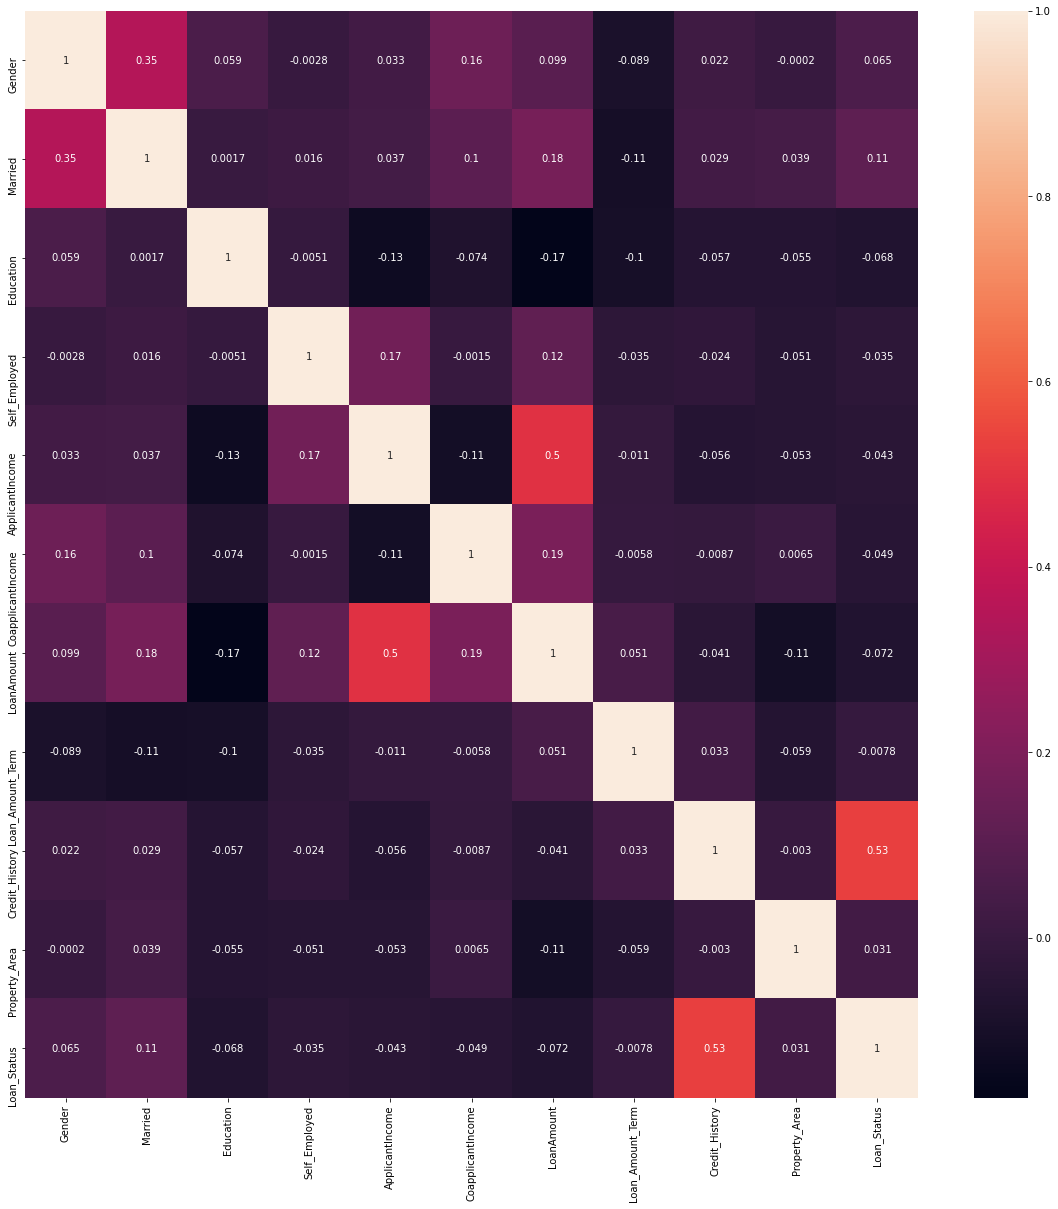

In [28]:
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot  = True)

In [29]:
x = data.drop("Loan_Status",axis = 1)

In [30]:
y = data["Loan_Status"]

In [31]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [32]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

In [33]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 44)

In [34]:
#printing the top 5 rows of training data
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
475,1,1,2,0,1,16525,1014.0,150.0,360.0,1.0,0
142,1,0,0,0,1,6950,0.0,175.0,180.0,1.0,1
540,0,1,1,0,0,4608,2845.0,140.0,180.0,1.0,1
429,1,0,0,1,0,2717,0.0,60.0,180.0,1.0,2
99,1,1,0,0,0,1759,3541.0,131.0,360.0,1.0,1


In [35]:
y_train.head()

475    1
142    1
540    1
429    1
99     1
Name: Loan_Status, dtype: int32

In [36]:
#using svm
svp = svm.SVC(kernel = "linear")

In [37]:
#fitting the training and testing data in model
svp.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
#predicting the values
predicts = svp.predict(x_test)

In [39]:
y_test

186    0
159    1
224    1
596    0
563    1
      ..
311    1
420    1
470    1
6      1
534    1
Name: Loan_Status, Length: 96, dtype: int32

In [40]:
#Accuracy score
accuracy_score(y_test,predicts)

0.8125

In [41]:
lr = LogisticRegression()
lr
#training the model
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
#predicting the values
pred = lr.predict(x_test)

In [43]:
y_test

186    0
159    1
224    1
596    0
563    1
      ..
311    1
420    1
470    1
6      1
534    1
Name: Loan_Status, Length: 96, dtype: int32

In [44]:
#Accuarcy of the Model
accuracy_score(y_test,pred)

0.8854166666666666

# Here we got more accuracy with Logistic Regression model